# Seleção de Features usando regressão logística multivariada com regularização L1

## 1. Carregando módulos e dados

In [1]:
# Manipulação dos dados
import numpy  as np
import scipy  as sp
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn           as sns
%matplotlib inline

In [2]:
# Carregando os dados
dados_one_hot      = pd.read_csv('../../Dados/one-hot.csv')
dados_one_hot_full = pd.read_csv('../../Dados/one-hot-total.csv')

In [5]:
dados_one_hot

,desfecho,TTO_anterior_TB_triagem_enfermeiro,Cicatriz_BCG,Idade,Sexo,Raça,Tem_companheiro,Tosse,Semanas_tosse,Expectoração,...,CAGE,Estado_civil_Casado,Estado_civil_Separado,Estado_civil_Solteiro,Estado_civil_ignorado,Estado_civil_viúvo,Fuma_Ex-fumante,Fuma_Fumante,Fuma_Jamais fumante,Fuma_ignorado
0,TB+,Sim,Sim,30,Masculino,Não branco,Não,Sim,ignorado,Não,...,Não,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,TB+,Sim,ignorado,53,Feminino,Branco,Não,Sim,Não,Sim,...,Não,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,TB+,Não,Não,84,Feminino,Branco,Não,Sim,Sim,Sim,...,Não,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,TB+,Não,Sim,18,Feminino,Branco,Sim,Sim,Sim,Não,...,Não,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,TB+,Sim,ignorado,36,Masculino,Não branco,Não,Sim,Não,Sim,...,Sim,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,TB+,Não,Sim,71,Masculino,Não branco,Sim,Sim,Sim,Sim,...,Não,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,TB+,Não,Não,26,Masculino,Branco,Sim,Sim,Sim,Sim,...,Não,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,TB+,Não,Sim,22,Feminino,Branco,Não,Sim,Não,Não,...,Não,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,TB+,Não,Não,54,Masculino,Não branco,Não,Sim,Sim,Sim,...,Sim,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,TB+,Sim,Sim,52,Masculino,Não branco,Não,Sim,Sim,Não,...,Sim,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
dados_one_hot_full

,desfecho,Idade,TTO_anterior_TB_triagem_enfermeiro_Não,TTO_anterior_TB_triagem_enfermeiro_Sim,TTO_anterior_TB_triagem_enfermeiro_ignorado,Cicatriz_BCG_Não,Cicatriz_BCG_Sim,Cicatriz_BCG_ignorado,Sexo_Feminino,Sexo_Masculino,...,Contato_TBP_2anos_Não,Contato_TBP_2anos_Sim,Contato_TBP_2anos_ignorado,Fuma_Ex-fumante,Fuma_Fumante,Fuma_Jamais fumante,Fuma_ignorado,CAGE_Não,CAGE_Sim,CAGE_ignorado
0,TB+,30,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,TB+,53,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,TB+,84,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,TB+,18,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,TB+,36,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,TB+,71,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,TB+,26,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,TB+,22,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,TB+,54,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,TB+,52,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## 2. Seleção de variáveis utilizando RL c L1

In [7]:
from sklearn.linear_model      import LogisticRegression as LR
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection   import cross_val_score

## 2.1 One-hot encoding normal

In [125]:
dados_one_hot

,desfecho,TTO_anterior_TB_triagem_enfermeiro,Cicatriz_BCG,Idade,Sexo,Raça,Tem_companheiro,Tosse,Semanas_tosse,Expectoração,...,CAGE,Estado_civil_Casado,Estado_civil_Separado,Estado_civil_Solteiro,Estado_civil_ignorado,Estado_civil_viúvo,Fuma_Ex-fumante,Fuma_Fumante,Fuma_Jamais fumante,Fuma_ignorado
0,TB+,Sim,Sim,30,Masculino,Não branco,Não,Sim,ignorado,Não,...,Não,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,TB+,Sim,ignorado,53,Feminino,Branco,Não,Sim,Não,Sim,...,Não,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,TB+,Não,Não,84,Feminino,Branco,Não,Sim,Sim,Sim,...,Não,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,TB+,Não,Sim,18,Feminino,Branco,Sim,Sim,Sim,Não,...,Não,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,TB+,Sim,ignorado,36,Masculino,Não branco,Não,Sim,Não,Sim,...,Sim,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,TB+,Não,Sim,71,Masculino,Não branco,Sim,Sim,Sim,Sim,...,Não,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,TB+,Não,Não,26,Masculino,Branco,Sim,Sim,Sim,Sim,...,Não,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,TB+,Não,Sim,22,Feminino,Branco,Não,Sim,Não,Não,...,Não,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,TB+,Não,Não,54,Masculino,Não branco,Não,Sim,Sim,Sim,...,Sim,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,TB+,Sim,Sim,52,Masculino,Não branco,Não,Sim,Sim,Não,...,Sim,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [126]:
y = dados_one_hot.desfecho
y.replace(['TB+','TB-'],[1,0],inplace=True)

X = dados_one_hot.drop(['desfecho'],axis=1)

In [127]:

X.replace(['Sim','Não','ignorado'],[1,-1,0],inplace=True)
X.replace(['Masculino','Feminino'],[1,0],inplace=True)
X.replace(['Não branco','Branco'],[0,1],inplace=True)

In [128]:
# teste logistica
clf = LR(penalty='l1',C=0.01)

In [129]:
clf.fit(X,y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [144]:
C = np.linspace(0.001,100,num=10000)

In [161]:
dict_features_normal      = dict()

for reg_value in C[:1000]:
    features_escolhidas = []
    clf = LR(penalty='l1',C=reg_value)
    clf.fit(X,y)
    
    for index, feature in enumerate(clf.coef_.tolist()[0]):
        if feature != 0:
            features_escolhidas.append(X.columns[index])
        
    dict_features_normal[reg_value] = features_escolhidas

In [162]:
valores_normal = []
for reg_values in C[:1000]:
    print(reg_values, len(dict_features_normal[reg_values]))
    valores_normal.append(len(dict_features_normal[reg_values]))

0.001 1
0.01100090009 6
0.02100180018 9
0.03100270027 11
0.04100360036 14
0.05100450045 16
0.0610054005401 16
0.0710063006301 17
0.0810072007201 19
0.0910081008101 20
0.1010090009 20
0.11100990099 20
0.12101080108 20
0.13101170117 21
0.14101260126 21
0.15101350135 21
0.16101440144 21
0.17101530153 21
0.18101620162 21
0.19101710171 21
0.2010180018 22
0.21101890189 22
0.22101980198 23
0.23102070207 24
0.24102160216 24
0.25102250225 26
0.26102340234 26
0.27102430243 26
0.28102520252 26
0.29102610261 26
0.3010270027 26
0.31102790279 26
0.32102880288 26
0.33102970297 26
0.34103060306 26
0.35103150315 26
0.36103240324 26
0.37103330333 26
0.38103420342 26
0.39103510351 26
0.4010360036 26
0.41103690369 26
0.42103780378 26
0.43103870387 26
0.44103960396 26
0.45104050405 26
0.46104140414 26
0.47104230423 26
0.48104320432 26
0.49104410441 26
0.5010450045 26
0.51104590459 26
0.52104680468 26
0.53104770477 26
0.54104860486 26
0.55104950495 26
0.561050405041 26
0.571051305131 26
0.581052205221 26
0.

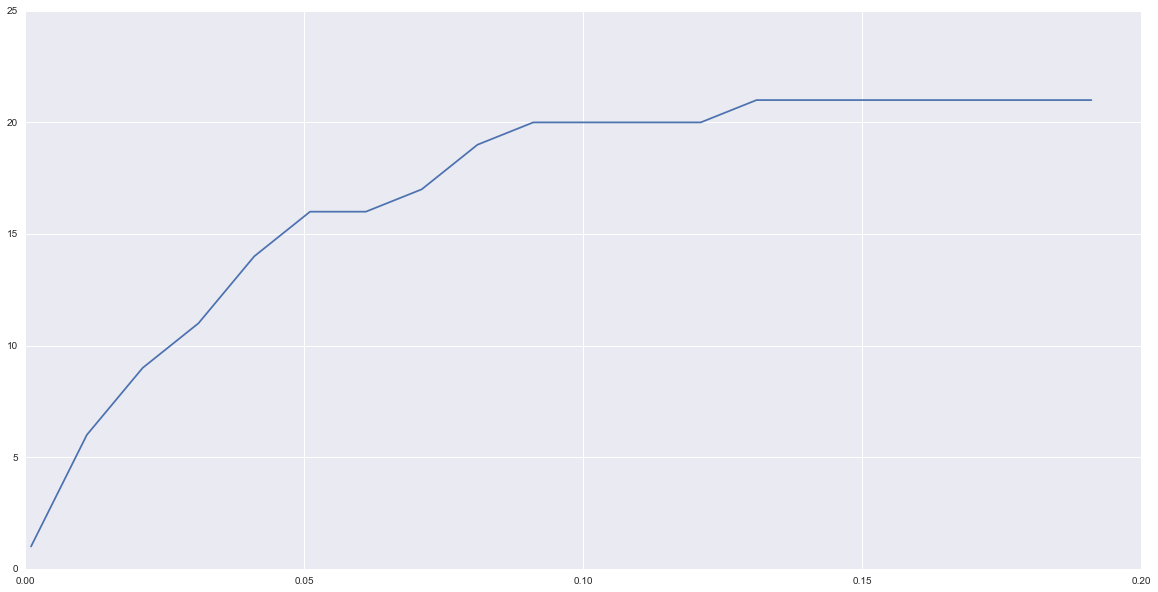

In [164]:
x = np.array(valores_normal)
plt.figure(figsize=(20,10))
plt.plot(C[:20],x[:20])
plt.show()

## 2.2 One-hot encoding Full

In [ ]:
dados_one_hot_full

In [104]:
C = np.linspace(0.01,100,num=5000)

In [13]:
y = dados_one_hot_full.desfecho
y.replace(['TB+','TB-'],[1,0],inplace=True)
X = dados_one_hot_full.drop(['desfecho'],axis=1)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [19]:
# teste logistica
clf = LR(penalty='l1',C=0.01)

In [20]:
clf.fit(X,y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
# Loop para verificar quantas features são escolhidas para determinado número de C

dict_features      = dict()

for reg_value in C:
    features_escolhidas = []
    clf = LR(penalty='l1',C=reg_value)
    clf.fit(X,y)
    
    for index, feature in enumerate(clf.coef_.tolist()[0]):
        if feature != 0:
            features_escolhidas.append(X.columns[index])
        
    dict_features[reg_value] = features_escolhidas

In [112]:
valores = []
for reg_values in C:
    print(reg_values, len(dict_features[reg_values]))
    valores.append(len(dict_features[reg_values]))

0.01 2
0.0300020004001 9
0.0500040008002 12
0.0700060012002 16
0.0900080016003 18
0.110010002 22
0.1300120024 24
0.150014002801 24
0.170016003201 25
0.190018003601 26
0.210020004001 27
0.230022004401 29
0.250024004801 31
0.270026005201 31
0.290028005601 31
0.310030006001 32
0.330032006401 32
0.350034006801 32
0.370036007201 32
0.390038007602 32
0.410040008002 33
0.430042008402 33
0.450044008802 36
0.470046009202 35
0.490048009602 35
0.510050010002 36
0.530052010402 37
0.550054010802 39
0.570056011202 39
0.590058011602 38
0.610060012002 38
0.630062012402 39
0.650064012803 39
0.670066013203 38
0.690068013603 38
0.710070014003 39
0.730072014403 38
0.750074014803 38
0.770076015203 38
0.790078015603 38
0.810080016003 38
0.830082016403 39
0.850084016803 39
0.870086017203 39
0.890088017604 39
0.910090018004 39
0.930092018404 39
0.950094018804 39
0.970096019204 39
0.990098019604 39
1.01010002 39
1.0301020204 40
1.0501040208 39
1.0701060212 40
1.0901080216 39
1.110110022 39
1.1301120224 40
1.15

In [121]:
C

array([  1.00000000e-02,   3.00020004e-02,   5.00040008e-02, ...,
         9.99599960e+01,   9.99799980e+01,   1.00000000e+02])

In [115]:
type(valores)

list

In [116]:
x = np.array(valores)

In [117]:
x

array([ 2,  9, 12, ..., 73, 73, 72])

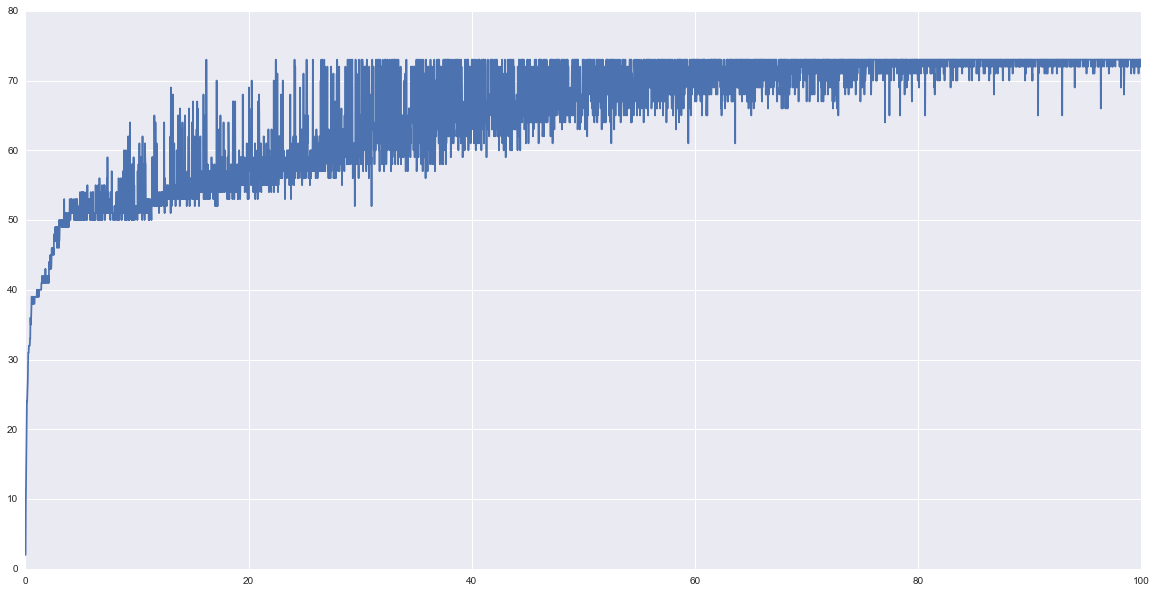

In [124]:
plt.figure(figsize=(20,10))
plt.plot(C,x)
plt.show()

In [41]:
for i in clf.coef_:
    print(i + 1)
    print()

[ 0.97859874  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.4672027   1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.        ]



In [58]:
a = clf.coef_.tolist()[0]

In [60]:
a[0]

-0.021401258840983792